## Gradient Descent

[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) is a simple optimization technique which forms the building block in training neural networks.
But we all have used this in our daily life in one way or the other. I'll give one example. Remember the days when we
used TV antennas. Whenever we see grainy images, we had to adjust antenna's alignment.
First, we change the antenna's position in different directions and find which direction gave better results. Then, we make further adjustments in the same direction until we get fine image.
This is exactly gradient descent does. We make some adjustments to variables in such a way to get maximum performance out of the system.

Let's import the packages that we need for array arithmetrics and plotting (matplotlib and seaborne)

In [85]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

Define the functions for computing function values at $x$ and $y$ and partial derivatives of $f$ w.r.t to $x$ and $y$

In [86]:
def fun(x, y):
    return x**2 + y**2

def fun_der_x(x):
    return 2 * x

def fun_der_y(y):
    return 2 * y

We start the search from a random point ie. random values for $x$ and $y$

In [87]:
# Initial values - Start the solution search randomly
random = np.random.randint(-100,100,2)
x, y = random[0], random[1]
f = fun(x, y)

And we create a matplotlib figure for plotting the results

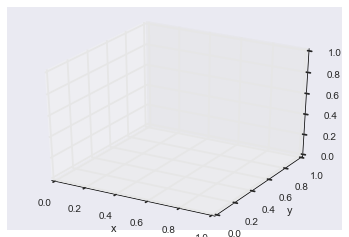

In [88]:
# Figure for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f")

We define the parameters for gradient descent such as update rate $\eta$ and number of iterations $niter$ respectively

In [89]:
# Parameters
step_size = 0.07
n_iter = 100

And finally, we perform gradient descent and at every step, we also display the updated values for $x$ and $y$ in the plot.

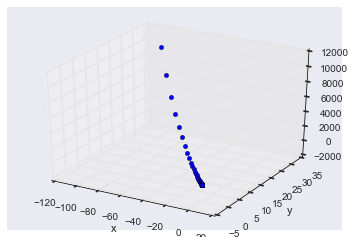

In [90]:
# Do gradient descent
for i in range(n_iter):
    der_x = fun_der_x(x)
    der_y = fun_der_y(y)
    x_prev, y_prev, f_prev = x,y,f
    x -= step_size * der_x
    y -= step_size * der_y
    f = fun(x, y)
    ax.scatter(x_prev, y_prev, f_prev)
display(fig)

Voila! See how the solution has evolved from a random point to the point where we get minumum of f.